# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [ ]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the working directory to your project folder.
import os
colab_path = '/content/drive/MyDrive/'
file_path = 'final_project'
os.chdir(colab_path + file_path)

## Step 0 | Imports and Setup

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# Open a dataset from your project folder in Google Drive
data = pd.read_csv('Econ Data Analysis NFL Project.csv')

## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [ ]:
# Data operations here

In [ ]:
# Save your dataset after you've worked on it
# make it so data only has 'Team' 'Week' 'point Total' 'Temperature' 'Wind' 'Weather' 'Bad Weather
data = data[['Team', 'Week ', 'Point Total', 'Temperature', 'Wind (mph)', 'Weather', 'Bad Weather']]
data['Bad_Weather'] = data['Bad Weather'].replace({'No': 0, 'Yes': 1})
data['Point_Total'] = data['Point Total']

/tmp/ipython-input-1470667612.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Bad_Weather'] = data['Bad Weather'].replace({'No': 0, 'Yes': 1})


## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

In [ ]:
# Exploratory Data Analysis here
#Main variables that I will be looking at here is the Point total, and the Bad Weather which was detremined using the three weather columns (weather, temperature, and wind)
# Which I will then analyze using beta 1 and the p-value

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

In [ ]:
# Build and run your model here
#Null Hypothesis: Bad weather does not affect the amount of points scored in NFL games
model = smf.ols('Point_Total ~ Bad_Weather', data).fit()
print(model.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.5531      0.612     76.061      0.000      45.351      47.755
Bad_Weather    -4.3140      1.488     -2.899      0.004      -7.238      -1.390


Text(0.5, 1.0, '2024 NFL Point Total by Game by Weather')

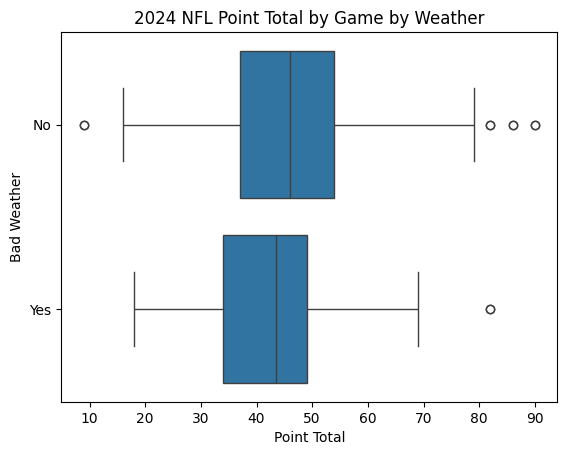

In [ ]:
sns.boxplot(x='Point Total', y='Bad Weather', data=data)
plt.title('2024 NFL Point Total by Game by Weather')

Text(0.5, 1.0, 'NFL Point Total by Weather')

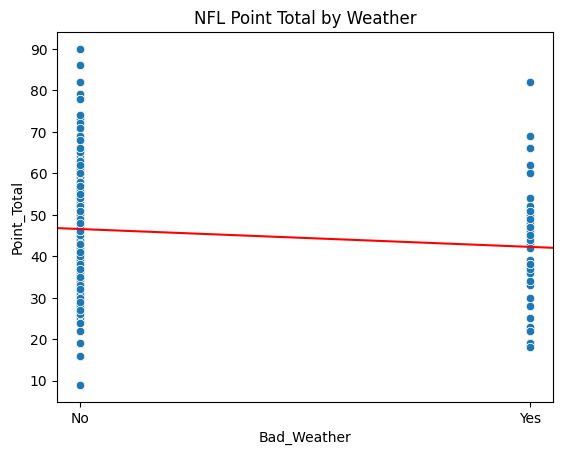

In [ ]:
sns.scatterplot(data, x='Bad_Weather', y='Point_Total')
plt.xticks([0,1], labels=['No', 'Yes'])
plt.axline(xy1=(0, 46.5531), slope=-4.3140, color='red')
plt.title('NFL Point Total by Weather')

Text(0.5, 1.0, 'NFL Point Total by Weather')

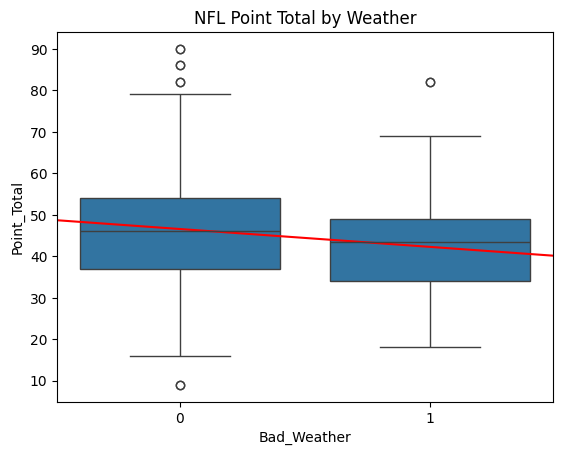

In [ ]:
sns.boxplot(x='Bad_Weather', y='Point_Total', data=data)
plt.axline(xy1=(0, 46.5531), slope=-4.3140, color='red')
plt.title('NFL Point Total by Weather')